#Nesse Projeto iremos trabalhar com as seguintes propostas:


##1.   Instalar as bibliotecas a serem utlizadas e a importação do documento
##2.   Realizar uma Análise Textual
##3.   Realizar uma Análise de NER
##4.   Através do Aprendizado de Máquina treinar uma IA em cima do texto
##5.   Após isso gerar um novo texto e realizarmos uma acurácia através da similaridade dos textos



##1.   Instalar as bibliotecas a serem utlizadas e a importação do documento

In [ ]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!python -m spacy download pt_core_news_lg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import spacy
import nltk
import numpy as np
from spacy.lang.pt.examples import sentences
from spacy import displacy
from torch.nn import functional as F
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [3]:
with open("MulherDePreto.txt", 'r') as f:
    text = f.read()

##2.   Realizar uma Análise Textual




In [4]:
# Print referente a quantidade de palavras
print(len(text))

49721


In [5]:
# Print das 1000 primeiras palavras
print(text[:1000])

Capítulo Primeiro
A primeira vez que o Dr. Estêvão Soares falou ao deputado Meneses foi no Teatro Lírico no tempo da memorável luta entre lagruístas e chartonistas. Um amigo comum os apresentou ao outro. No fim da noite separaram-se oferecendo cada um deles os seus serviços e trocando os respectivos cartões de visita.

Só dous meses depois encontraram-se outra vez.

Estêvão Soares teve de ir à casa de um ministro de Estado para saber de uns papéis relativos a um parente da província, e aí encontrou o deputado Meneses, que acabava de ter uma conferência política.

Houve sincero prazer em ambos encontrando-se pela segunda vez; e Meneses arrancou de Estêvão a promessa de que iria à casa dele daí a poucos dias.

O ministro depressa despachou o jovem médico.

Chegando ao corredor, Estêvão foi surpreendido com uma tremenda bátega d'água, que nesse momento caía, e começava a alagar a rua.

O rapaz olhou a um e outro lado a ver se passava algum veículo vazio, mas procurou inutilmente; todos qu

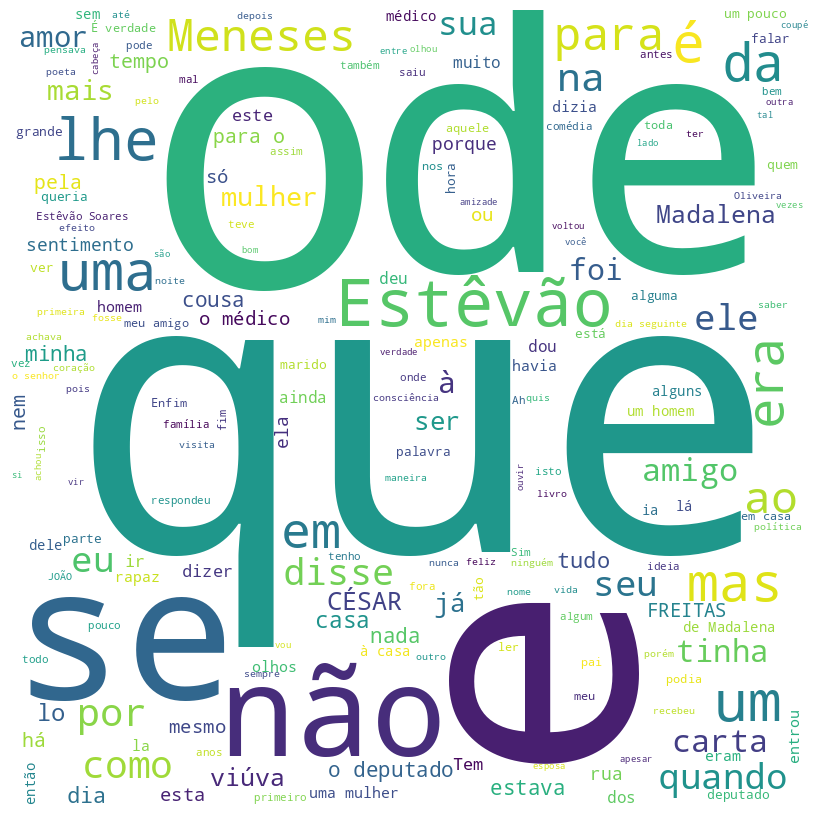

In [6]:
# Criação da Nuvem de Palavras
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)

# Definição de como a imagem será exibida
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Salvar a imagem para exibição
plt.savefig("wordcloud.png")

In [7]:
# Função para separar e adicionar em um dicionário

def word_meaning(text):
    # carregar o modelo de linguagem em português do spaCy
    nlp = spacy.load("pt_core_news_sm")
    nlp.max_length = 322878

    # analisar o texto usando o spaCy
    doc = nlp(text)

    # criar um dicionário para armazenar as palavras de cada tipo
    words = {"substantivos": [], "verbos": [], "adjetivos": [], "advérbios": [], "outros": []}

    # iterar pelas palavras do texto e adicioná-las ao dicionário
    for token in doc:
        if token.pos_ == "NOUN":
            words["substantivos"].append(token.text)
        elif token.pos_ == "VERB":
            words["verbos"].append(token.text)
        elif token.pos_ == "ADJ":
            words["adjetivos"].append(token.text)
        elif token.pos_ == "ADV":
            words["advérbios"].append(token.text)
        else:
            words["outros"].append(token.text)

    # retornar as listas de palavras para cada tipo de palavra
    return [words["substantivos"], words["verbos"], words["adjetivos"], words["advérbios"], words["outros"]]


In [8]:
# obter a lista de substantivos
lista_de_substantivos = word_meaning(text)[0]

# obter a lista de verbos
lista_de_verbos = word_meaning(text)[1]

# obter a lista de adjetivos
lista_de_adjetivos = word_meaning(text)[2]

# obter a lista de advérbios
lista_de_advérbios = word_meaning(text)[3]

# obter a lista de outras palavras
lista_de_outras_palavras = word_meaning(text)[4]

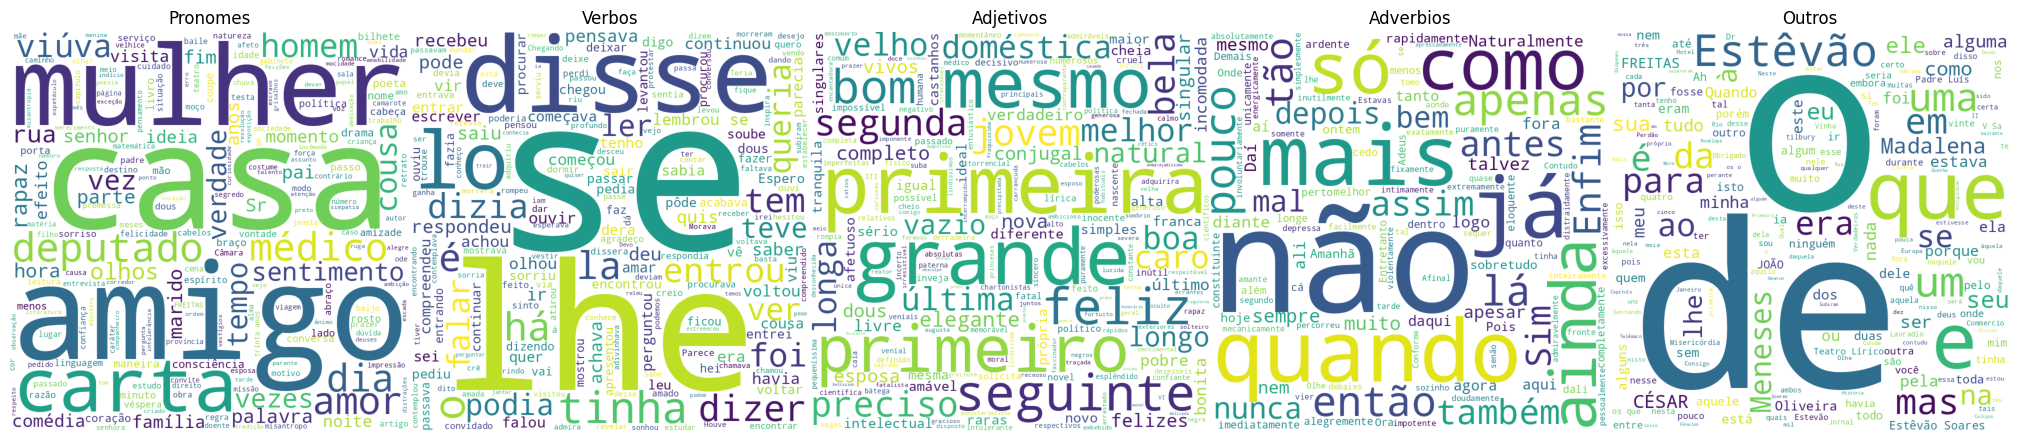

In [9]:
# Criar as nuvens de palavras

nouncloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_substantivos))
verbcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_verbos))
adjcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_adjetivos))
advcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_advérbios))
othercloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_outras_palavras))


# Definir como as imagens serão exibidas

fig, axs = plt.subplots(1, 5, figsize=(20, 8))

axs[0].imshow(nouncloud)
axs[0].axis("off")
axs[0].set_title('Pronomes')

axs[1].imshow(verbcloud)
axs[1].axis("off")
axs[1].set_title('Verbos')

axs[2].imshow(adjcloud)
axs[2].axis("off")
axs[2].set_title('Adjetivos')

axs[3].imshow(advcloud)
axs[3].axis("off")
axs[3].set_title('Adverbios')

axs[4].imshow(othercloud)
axs[4].axis("off")
axs[4].set_title('Outros')

plt.tight_layout(pad=0)

plt.savefig('nouncloud.png')
plt.savefig('verbcloud.png')
plt.savefig('adjcloud.png')
plt.savefig('advcloud.png')
plt.savefig('othercloud.png')

##3.Realizar uma Análise de NER







In [10]:
# Analisando Entidades
pln = spacy.load('pt_core_news_lg')
pln.max_length = 1115395
documento = pln(text)

In [11]:
def word_meaning(text):
    # carregar o modelo de linguagem em português do spaCy
  pln = spacy.load('pt_core_news_lg')
  pln.max_length = 1115395


    # analisar o texto usando o spaCy
  documento = pln(text)

      # criar um dicionário para armazenar as palavras de cada tipo
  words = {"Pessoas": [], "Locais": [], "Organizacoes": [], "Diversos": [], "Outros": []}

      # iterar pelas palavras do texto e adicioná-las ao dicionário
  for entidade in documento.ents:
    if entidade.label_ == "PER":
      words["Pessoas"].append(entidade.text)
    elif entidade.label_ == "LOC":
      words["Locais"].append(entidade.text)
    elif entidade.label_ == "ORG":
      words["Organizacoes"].append(entidade.text)
    elif entidade.label_ == "MISC":
      words["Diversos"].append(entidade.text)
    else:
      words["Outros"].append(entidade.text)
    # retornar as listas de palavras para cada tipo de palavra
  return [words["Pessoas"], words["Locais"], words["Organizacoes"], words["Diversos"], words["Outros"]]



In [12]:
# obter a lista de entidade pessoa
lista_de_pessoas = word_meaning(text)[0]

# obter a lista de entidade locais
lista_de_locais = word_meaning(text)[1]

# obter a lista de entidade organizações
lista_de_organizacoes = word_meaning(text)[2]

# obter a lista de advérbios
lista_de_diversos = word_meaning(text)[3]


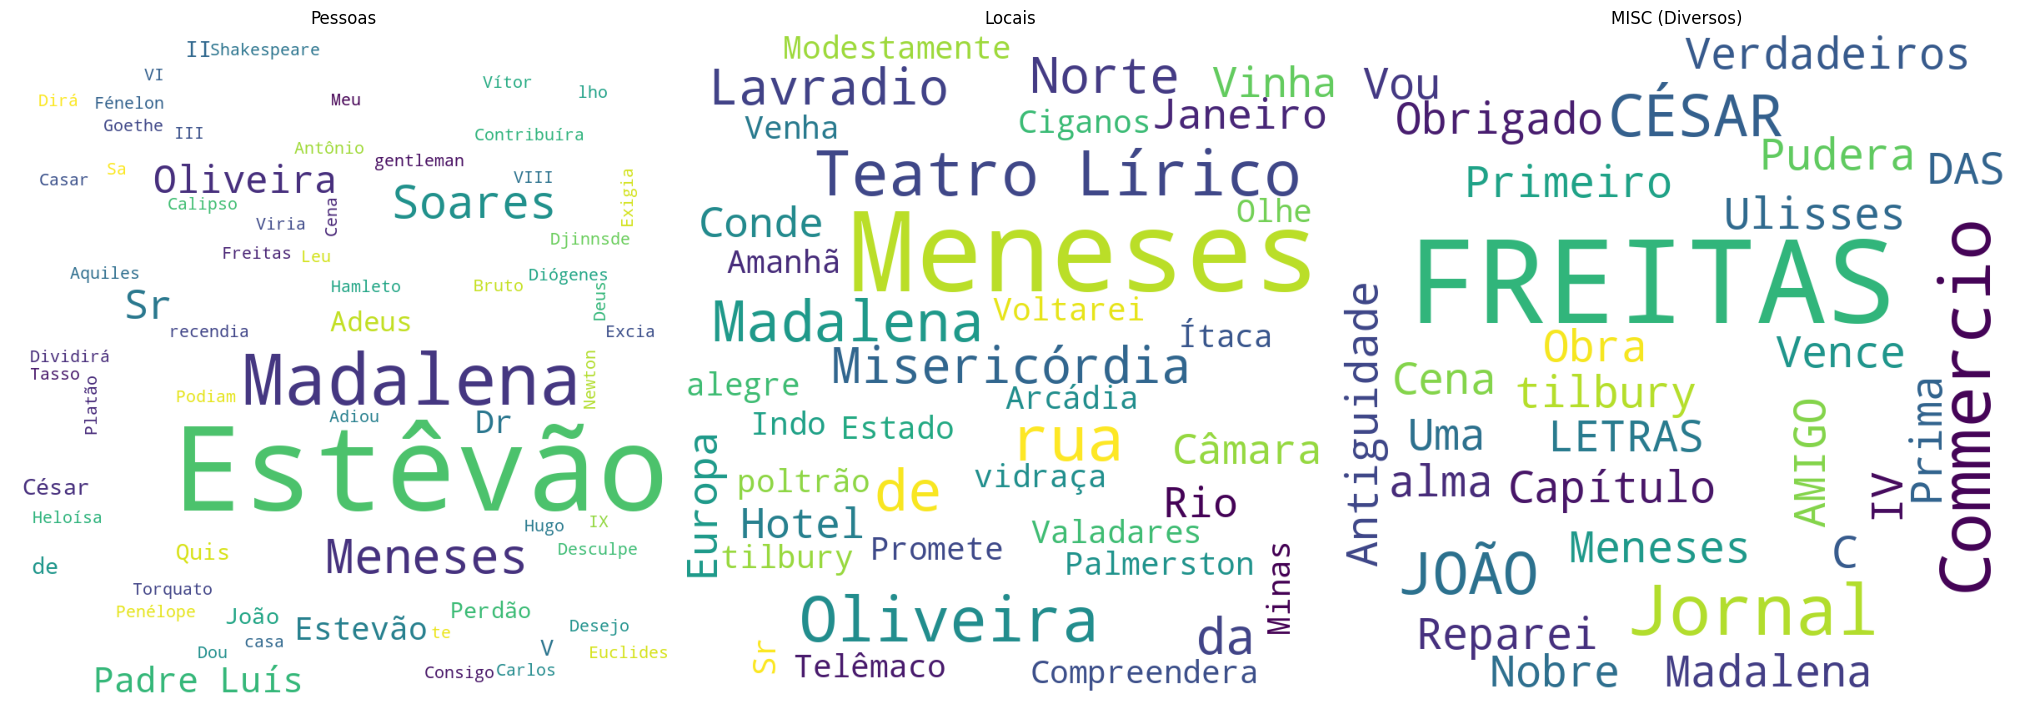

In [13]:
# Criação das nuvens de palavras

percloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_pessoas))
loccloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_locais))
misccloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_diversos))


# Definir como as imagens serão exibidas

fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].imshow(percloud)
axs[0].axis("off")
axs[0].set_title('Pessoas')

axs[1].imshow(loccloud)
axs[1].axis("off")
axs[1].set_title('Locais')

axs[2].imshow(misccloud)
axs[2].axis("off")
axs[2].set_title('MISC (Diversos)')

plt.tight_layout(pad=0)

plt.savefig('percloud.png')
plt.savefig('loccloud.png')
plt.savefig('misccloud.png')

##4.   Através do Aprendizado de Máquina treinar uma IA encima do texto


In [17]:
# hyperparametros
batch_size = 16 # Tamanho do lote usado durante o treinamento. Isso significa quantas amostras de treinamento são usadas em uma iteração de treinamento
block_size = 32 # Tamanho do bloco usado para divisão do texto de entrada em segmentos para o modelo processar. O modelo processa o texto sequencialmente em blocos
max_iters = 10000 # Número máximo de iterações de treinamento para o modelo
eval_interval = 100 # Define a frequência com que o modelo será avaliado durante o treinamento. É definido em termos de iterações de treinamento
learning_rate = 1e-3 # Taxa de aprendizado do modelo. Controla a taxa na qual o modelo ajusta os pesos durante o treinamento
device = 'cuda' if torch.cuda.is_available() else 'cpu' # Define o dispositivo no qual o modelo será executado. 'cuda' é para usar a GPU se ela estiver disponível e 'cpu' é para usar a CPU
eval_iters = 200 # Define o número de iterações de treinamento antes da avaliação do modelo
n_embd = 64 # Dimensão do espaço de incorporação do modelo. É a dimensão em que o modelo representa cada token no texto
n_head = 4 # Número de cabeças de atenção que o modelo usa
n_layer = 4 # Número de camadas no modelo
dropout = 0.0 # Taxa de dropout que o modelo usa. É uma técnica de regularização que ajuda a evitar o overfitting, fazendo com que o modelo "esqueça" alguns dos recursos durante o treinamento
# ------------



torch.manual_seed(1337)


# Aqui estão todos os caracteres únicos que ocorrem neste texto.
chars = sorted(list(set(text)))
vocab_size = len(chars)
# Cria um mapeamento de caracteres para inteiros.
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] 
decode = lambda l: ''.join([itos[i] for i in l])

# Divisão de Treinamento e Testes
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # Serão treinados os primeiros 90% do texto
train_data = data[:n]
val_data = data[n:]

# Carregamento dos dados
def get_batch(split):
    # Gerar um pequeno lote de dados de entradas x e alvos y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    
      def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

      def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # Calcular os escores de atenção ("afinidades")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):

    def __init__(self, n_embd, n_head):
        # n_embd: Dimensão de embedding, n_head: Numero de head`s que queremos
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# Modelo de bigrama simples
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # Cada token lê diretamente os logit do próximo token de uma tabela de consulta.
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # Camada de normalização final
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx e targets são ambos tensores (B, T) de inteiros
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :] # becomes (B, C)
            probs = F.softmax(logits, dim=-1) # (B, C)
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# Imprime o número de parâmetros no modelo
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# Cria o optimizador PyTorch
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # Amostra de um lote de dados
    xb, yb = get_batch('train')

    # Calcula as perdas
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

0.212051 M parameters
step 0: train loss 4.5885, val loss 4.5930
step 100: train loss 2.5428, val loss 2.5305
step 200: train loss 2.3822, val loss 2.3776
step 300: train loss 2.3032, val loss 2.3007
step 400: train loss 2.2409, val loss 2.2308
step 500: train loss 2.1638, val loss 2.1551
step 600: train loss 2.1088, val loss 2.1056
step 700: train loss 2.0529, val loss 2.0602
step 800: train loss 2.0111, val loss 2.0075
step 900: train loss 1.9449, val loss 1.9655
step 1000: train loss 1.9236, val loss 1.9468
step 1100: train loss 1.8812, val loss 1.9173
step 1200: train loss 1.8636, val loss 1.9161
step 1300: train loss 1.8101, val loss 1.8771
step 1400: train loss 1.7751, val loss 1.8412
step 1500: train loss 1.7494, val loss 1.8344
step 1600: train loss 1.7354, val loss 1.8420
step 1700: train loss 1.6988, val loss 1.8078
step 1800: train loss 1.6621, val loss 1.8056
step 1900: train loss 1.6410, val loss 1.8116
step 2000: train loss 1.6271, val loss 1.7873
step 2100: train loss 1.

##5.   Após isso gerar um novo texto e realizarmos uma acurácia através da similaridade dos textos

In [18]:
context = torch.zeros((2, 2), dtype=torch.long, device=device)
generated_tokens = m.generate(context, max_new_tokens=1000)[0].tolist()
generated_text = decode(generated_tokens)

print("\n-- Texto gerado pelo modelo de linguagem --\n")
print("-" * 40)
print(generated_text[:1000])  # imprime os primeiros 1000 caracteres do texto gerado
print("-" * 40)



-- Texto gerado pelo modelo de linguagem --

----------------------------------------


- Eu lá à havia voltava licente quando é pagão.

No homamento, portanto por à todista, de trocal esconderadorâupara-se de quar a anoi encentrar nos mares parecimentos; que a conversavam a cabeça este tinha uma constituilbury, de Madalena tar nos longouatos, do tempo poeta na soca e o artido quando o cabelo, e contudou Nestudoraçar a mulher, e feições, não há entusias conostados cou são ser foçou fetuge... O verdadeira tradr do médico, por modo: tudo e fatornor; ao anunca, vendo invera-se a comédia ela figidelente com a quanto o Sha falara para a partido lacre conhecia cousa mais as felizes. Sim ó, uma testa e confertúnio lhe haver o que achava à primeira ficar que a confiança, e contudou-de polava no múme conito, da escada que o bom se comparte nesse dia seguinte, com ela achava-se em um piênto mote.

Durante operações a incombrofetidade dizer casa lá palava com o trha.

Quiria amor dos quais eram 

In [19]:
# Define as duas strings a serem comparadas
text1 = text
text2 = generated_text

# Tokeniza, remove stop words e lematiza as palavras em cada texto
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('portuguese')
tokens1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1) if word.lower() not in stop_words]
tokens2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2) if word.lower() not in stop_words]

# Cria um conjunto de todas as palavras usadas em ambos os textos
all_tokens = list(set(tokens1 + tokens2))

# Cria vetores de frequência para cada texto
freq1 = [tokens1.count(token) for token in all_tokens]
freq2 = [tokens2.count(token) for token in all_tokens]

# Calcula a similaridade de coseno entre os vetores de frequência
similarity = cosine_similarity([freq1], [freq2])[0][0]
print("Similaridade:", similarity)


Similaridade: 0.7245244260374017
